In [1]:
import FundamentalAnalysis as fa
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

import os
os.chdir('../')

from RL.Indicator import get_Bolinger_Band, get_DMI, get_MACD, get_OBV, get_RSI


ticker = "AAPL"
api_key = "d2b83a9cbe59bd13f8c7615015e41b0e"

In [38]:
# Commodity Channel Index Python Code

# Load the necessary packages and modules
import matplotlib.pyplot as plt
import pandas as pd

# Commodity Channel Index 
def CCI(data, ndays): 
    TP = (data['high'] + data['low'] + data['close']) / 3 
    CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std()),
                    name = 'CCI') 
    data = data.join(CCI) 
    return data

In [47]:
# Ease Of Movement (EVM) Code

# Load the necessary packages and modules
 
# Ease of Movement 
def EVM(data, ndays): 
 dm = ((data['high'] + data['low'])/2) - ((data['high'].shift(1) + data['low'].shift(1))/2)
 br = (data['volume'] / 100000000) / ((data['high'] - data['low']))
 EVM = dm / br 
 EVM_MA = pd.Series(EVM.rolling(ndays).mean(), name = 'EVM') 
 data = data.join(EVM_MA) 
 return data 
 


In [48]:


# Compute the 14-day Ease of Movement for AAPL
n = 14
AAPL_EVM = EVM(stock_data_detailed, n)
EVM = AAPL_EVM['EVM']

In [1]:
AAPL_EVM

NameError: name 'AAPL_EVM' is not defined

In [56]:
# Moving Averages Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd

# Simple Moving Average 
def SMA(data, ndays): 
 SMA = pd.Series(data['close'].rolling(ndays).mean(), name = 'SMA') 
 data = data.join(SMA) 
 return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
 EMA = pd.Series(data['close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
 data = data.join(EMA) 
 return data

In [55]:
# Retrieve the Nifty data from Yahoo finance:
close = stock_data_detailed['close']

# Compute the 30-day SMA for NIFTY
n = 30
SMA_NIFTY = SMA(stock_data_detailed,n)
SMA_NIFTY = SMA_NIFTY.dropna()
SMA = SMA_NIFTY['SMA']

# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_NIFTY = EWMA(stock_data_detailed,ew)
EWMA_NIFTY = EWMA_NIFTY.dropna()
EWMA = EWMA_NIFTY['EWMA_200']

2001-10-19      1.398201
2001-10-22      1.397761
2001-10-23      1.396638
2001-10-24      1.396103
2001-10-25      1.395804
                 ...    
2020-07-27    300.105043
2020-07-28    300.830466
2020-07-29    301.619815
2020-07-30    302.447080
2020-07-31    303.666910
Name: EWMA_200, Length: 4728, dtype: float64

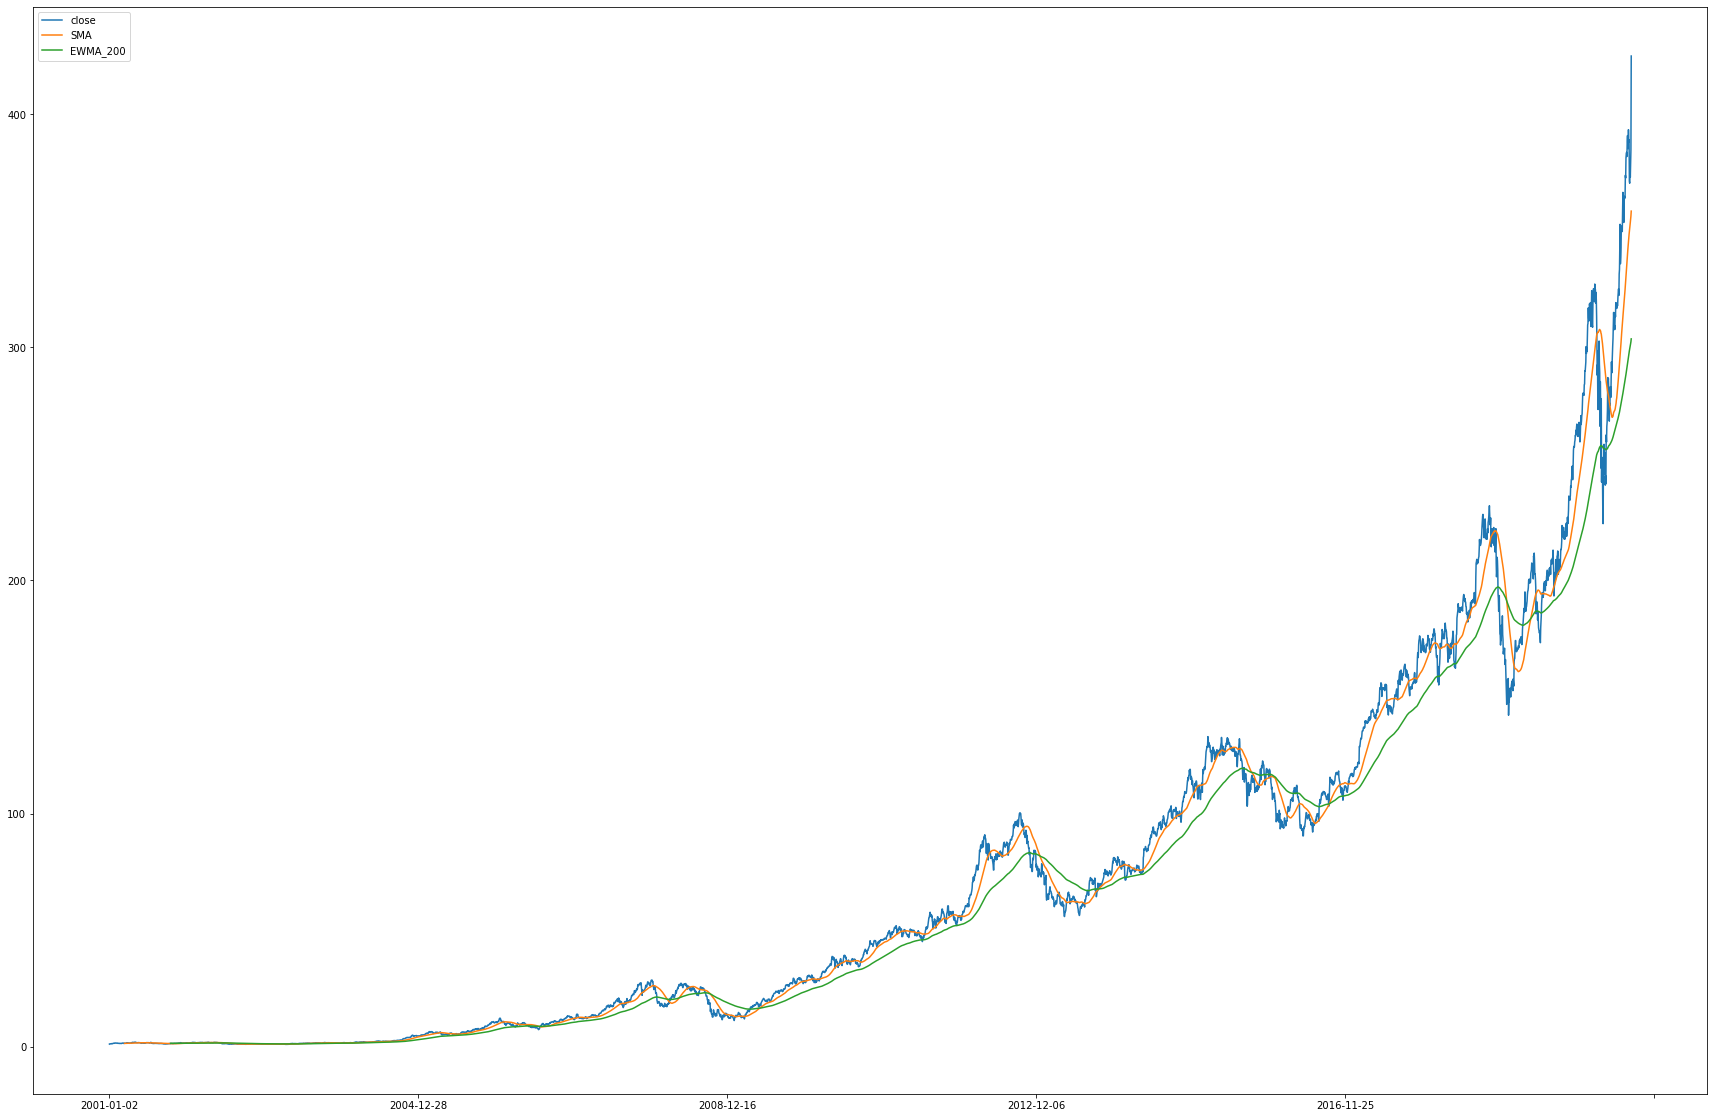

In [72]:
pd.concat([stock_data_detailed[['close']], SMA_NIFTY[['SMA']], EWMA_NIFTY[['EWMA_200']]], axis=1).plot(figsize=(30,20))

In [90]:
# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data

In [91]:
# Force Index 
def ForceIndex(data, ndays): 
    FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
    data = data.join(FI) 
    return data

In [2]:
# Collect general company information
profile = fa.profile(ticker, api_key)

In [3]:
profile

,0
symbol,AAPL
price,425.04
beta,1.2285
volAvg,35035392
mktCap,1842263620000
lastDiv,3.13
range,192.58-425.66
changes,40.28
companyName,Apple Inc.
exchange,Nasdaq Global Select


In [4]:
# Collect recent company quotes
quotes = fa.quote(ticker, api_key)
quotes

,0
symbol,AAPL
name,Apple Inc.
price,425.04
changesPercentage,10.47
change,40.28
dayLow,403.36
dayHigh,425.66
yearHigh,425.66
yearLow,192.58
marketCap,1.84226e+12


In [5]:
# Collect market cap and enterprise value
entreprise_value = fa.enterprise(ticker, api_key)
entreprise_value

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
symbol,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
stockPrice,249.05,212.24,166.72,117.65,115.28,105.11,75.7,86.29,57.97,44.12,28.93,13.16,26.44,11.49,8.11,3.4,1.61,1.12,1.26
numberOfShares,4617834000,4955377000,5217242000,5470820000,5753421000,6085572000,925331000,934818000,924258000,909461000,893016000,881592000,864595000,808439000,808439000,371590000,360631000,355022000,345613000
marketCapitalization,1150071557700,1051729214480,869818586240,643641973000,663254372880,639654472920,70047556700,80665445220,53579236260,40125419320,25834952880,11601750720,22859891800,9288964110,6556440290,1263406000,580615910,3.97625e+08,435472380
minusCashAndCashEquivalents,48844000000,25913000000,20289000000,20484000000,21120000000,13844000000,14259000000,10746000000,9815000000,11261000000,5263000000,11875000000,9352000000,6392000000,3491000000,2969000000,3396000000,2252000000,2310000000
addTotalDebt,102067000000,102519000000,12992000000,7000000000,5000000000,35295000000,16960000000,0,0,0,0,0,0,0,0,0,0,316000000,317000000
enterpriseValue,1203294557700,1128335214480,862521586240,630157973000,647134372880,661105472920,72748556700,69919445220,43764236260,28864419320,20571952880,-273249280,13507891800,2896964110,3065440290,-1705594000,-2815384090,-1538375360,-1557527620


In [17]:
entreprise_value = entreprise_value.T[::-1]

In [35]:
stock_data_detailed = fa.stock_data_detailed(ticker, api_key, begin="2001-01-01", end="2020-08-01")

In [8]:
balance_sheet_quarterly = fa.balance_sheet_statement(ticker, api_key, period="quarter")

,2020-06,2020-03,2019-12,2019-09,2019-06,2019-03,2018-12,2018-09,2018-06,2018-03,...,2003-06,2003-03,2002-12,2002-09,2002-06,2002-03,2001-12,2001-09,2001-06,2001-03
fillingDate,2020-07-31,2020-05-01,2020-01-29,2019-10-31,2019-07-31,2019-05-01,2019-01-30,2018-11-05,2018-08-01,2018-05-02,...,2003-08-12,2003-05-13,2003-02-10,2002-12-19,2002-08-09,2002-05-14,2002-02-11,2001-12-21,2001-08-13,2001-05-14
acceptedDate,2020-07-30 19:29:09,2020-04-30 18:03:10,2020-01-28 18:02:44,2019-10-30 18:12:36,2019-07-31 16:31:53,2019-05-01 16:32:00,2019-01-30 16:31:37,2018-11-05 08:01:40,2018-08-01 16:31:48,2018-05-02 16:32:12,...,2003-08-12 16:09:14,2003-05-13 16:46:50,2003-02-10 16:43:14,2002-12-19 17:20:21,2002-08-09 16:52:48,2002-05-14 17:08:24,2002-02-11 00:00:00,2001-12-21 00:00:00,2001-08-13 00:00:00,None
period,Q3,Q2,Q1,FY,Q3,Q2,Q1,FY,Q3,Q2,...,Q3,Q2,Q1,FY,Q3,Q2,Q1,FY,Q3,Q2
cashAndCashEquivalents,33383000000,40174000000,39771000000,48844000000,50530000000,37988000000,44771000000,25913000000,31971000000,45059000000,...,3507000000,3410000000,2612000000,2252000000,1246000000,1159000000,1946000000,2310000000,2121000000,2138000000
shortTermInvestments,59642000000,53877000000,67391000000,51713000000,44084000000,42104000000,41656000000,40388000000,38999000000,42881000000,...,1038000000,1116000000,1850000000,2085000000,3060000000,3150000000,2421000000,2026000000,2097000000,151000000
cashAndShortTermInvestments,93025000000,94051000000,107162000000,100557000000,94614000000,80092000000,86427000000,66301000000,70970000000,87940000000,...,4545000000,4526000000,4462000000,4337000000,4306000000,4309000000,4367000000,4336000000,4218000000,2289000000
netReceivables,17882000000,15722000000,20970000000,22926000000,14148000000,15085000000,18077000000,23186000000,14104000000,14324000000,...,568000000,492000000,497000000,565000000,626000000,644000000,498000000,466000000,598000000,637000000
inventory,3978000000,3334000000,4097000000,4106000000,3355000000,4884000000,4988000000,3956000000,5936000000,7662000000,...,38000000,41000000,44000000,45000000,34000000,26000000,23000000,11000000,19000000,10000000
otherCurrentAssets,25180000000,30646000000,31002000000,35230000000,22856000000,23285000000,31336000000,37896000000,24751000000,20127000000,...,395000000,409000000,381000000,441000000,477000000,435000000,384000000,330000000,413000000,2409000000
totalCurrentAssets,140065000000,143753000000,163231000000,162819000000,134973000000,123346000000,140828000000,131339000000,115761000000,130053000000,...,5546000000,5468000000,5384000000,5388000000,5443000000,5414000000,5272000000,5143000000,5248000000,5345000000


In [15]:
balance_sheet_quarterly = balance_sheet_quarterly.T[::-1]

In [14]:
useCol = ['fillingDate', 'totalAssets', 'inventory', 'cashAndShortTermInvestments', 'totalCurrentAssets', 'commonStock', 'shortTermDebt']

In [75]:
balance_sheet_quarterly1 = balance_sheet_quarterly[useCol]

In [77]:
balance_sheet_quarterly1.index = balance_sheet_quarterly1['fillingDate']
balance_sheet_quarterly1.drop(['fillingDate'], axis=1, inplace=True)

C:\Users\sundooedu\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
balance_sheet_quarterly1

,totalAssets,inventory,cashAndShortTermInvestments,totalCurrentAssets,commonStock,shortTermDebt
fillingDate,,,,,,
2001-05-14,6130000000,10000000,2289000000,5345000000,1599000000,0
2001-08-13,6071000000,19000000,4218000000,5248000000,1673000000,0
2001-12-21,6021000000,11000000,4336000000,5143000000,1693000000,0
2002-02-11,6122000000,23000000,4367000000,5272000000,1706000000,0
2002-05-14,6264000000,26000000,4309000000,5414000000,1747000000,0
...,...,...,...,...,...,...
2019-07-31,322239000000,3355000000,94614000000,134973000000,4531395000,13529000000
2019-10-31,338516000000,4106000000,100557000000,162819000000,4443236000,10260000000
2020-01-29,340618000000,4097000000,107162000000,163231000000,4384959000,10224000000


In [19]:
income_statement_quarterly = fa.income_statement(ticker, api_key, period="quarter")

In [23]:
income_statement_quarterly = income_statement_quarterly.T[::-1]

In [22]:
useCol2 = ['fillingDate', 'revenue', 'costOfRevenue', 'grossProfit', 'grossProfitRatio', 'ebitda','ebitdaratio', 'operatingIncome', 'operatingIncomeRatio', 'eps']

In [32]:
income_statement_quarterly[useCol2]

,fillingDate,revenue,costOfRevenue,grossProfit,grossProfitRatio,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,eps
2001-06,2001-08-13,44000000,5e+06,39000000,0.886364,65000000,1.47727,39000000,0.886364,0.17
2001-09,2001-12-21,3888000000,3087000000,801000000,0.206019,-345000000,-0.0887346,-375000000,-0.0964506,-0.11
2001-12,2002-02-11,1375000000,953000000,422000000,0.306909,81000000,0.0589091,53000000,0.0385455,0.11
2002-03,2002-05-14,120000000,133000000,-13000000,-0.108333,4e+06,0.0333333,-25000000,-0.208333,0.11
2002-06,2002-08-09,1429000000,1038000000,391000000,0.273618,41000000,0.0286914,13000000,0.00909727,0.09
...,...,...,...,...,...,...,...,...,...,...
2019-06,2019-07-31,53809000000,33582000000,20227000000,0.375904,14477000000,0.269044,11544000000,0.214537,2.22
2019-09,2019-10-31,64040000000,39727000000,24313000000,0.379653,18804000000,0.293629,15625000000,0.243988,3.05
2019-12,2020-01-29,91819000000,56602000000,35217000000,0.383548,28385000000,0.309141,25569000000,0.278472,5.04
2020-03,2020-05-01,58313000000,35943000000,22370000000,0.383619,15639000000,0.268191,12853000000,0.220414,2.59


In [25]:
key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")

In [29]:
key_metrics_quarterly = key_metrics_quarterly.T[::-1]

In [28]:
useCol3 = ['revenuePerShare',  'netIncomePerShare', 'operatingCashFlowPerShare',\
       'freeCashFlowPerShare', 'cashPerShare', 'bookValuePerShare', 'roe', 'marketCap',\
           'enterpriseValue', 'inventoryTurnover', 'incomeQuality']

In [30]:
key_metrics_quarterly[useCol3]

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,roe,marketCap,enterpriseValue,inventoryTurnover,incomeQuality
2001-06,0.126159,0.051611,-0.094620,-0.180637,6.081459,11.061890,0.004666,4.708328e+08,-8.831672e+08,0.263158,-1.833333
2001-09,11.249577,-0.248833,0.795688,0.324062,6.683776,11.342166,-0.021939,4.354724e+08,-1.157528e+09,280.636364,-3.197674
2001-12,3.913699,0.108160,0.119546,0.017078,5.538952,11.288532,0.009581,5.832078e+08,-6.137922e+08,41.434783,1.105263
2002-03,0.339482,0.005658,0.005658,-0.115990,3.278828,11.355664,0.000498,6.044508e+08,1.674508e+08,5.115385,1.000000
2002-06,4.009877,0.089794,-0.103825,-0.190813,3.496366,11.409490,0.007870,3.813159e+08,-5.068410e+07,30.529412,-1.156250
...,...,...,...,...,...,...,...,...,...,...,...
2019-06,11.546562,2.155284,2.496902,2.067734,10.842940,20.697935,0.104130,9.771455e+11,1.025080e+12,10.009538,1.158503
2019-09,13.867974,2.963727,4.311545,3.710181,10.577253,19.595334,0.151247,1.150072e+12,1.203295e+12,9.675353,1.454771
2019-12,20.796867,5.036421,6.911829,6.434596,9.008072,20.278638,0.248361,1.364027e+12,1.427558e+12,13.815475,1.372369
2020-03,13.290500,2.563834,3.033798,2.611468,9.156321,17.874359,0.143436,1.242428e+12,1.301732e+12,10.780744,1.183305


In [39]:
stock_data_detailed = stock_data_detailed[::-1]

In [40]:
stock_data_detailed

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
2001-01-02,1.06,1.09,1.04,1.06,0.92,1.13078e+08,1.13078e+08,0,0,1.06333,"January 02, 01",0
2001-01-03,1.04,1.19,1.03,1.17,1.01,2.04268e+08,2.04268e+08,0.13,12.5,1.13,"January 03, 01",0.125
2001-01-04,1.3,1.32,1.2,1.22,1.06,1.84849e+08,1.84849e+08,-0.08,-6.154,1.24667,"January 04, 01",-0.06154
2001-01-05,1.21,1.24,1.15,1.17,1.01,1.03089e+08,1.03089e+08,-0.04,-3.306,1.18667,"January 05, 01",-0.03306
2001-01-08,1.21,1.21,1.14,1.18,1.02,9.34248e+07,9.34248e+07,-0.03,-2.479,1.17667,"January 08, 01",-0.02479
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,374.84,379.62,373.92,379.24,379.24,3.03035e+07,3.03035e+07,4.39999,1.174,377.593,"July 27, 20",0.01174
2020-07-28,377.47,378.2,372.99,373.01,373.01,2.59064e+07,2.59064e+07,-4.45999,-1.182,374.733,"July 28, 20",-0.01182
2020-07-29,375,380.92,374.85,380.16,380.16,2.25823e+07,2.25823e+07,5.16,1.376,378.643,"July 29, 20",0.01376
2020-07-30,376.75,385.19,375.07,384.76,384.76,3.95325e+07,3.95325e+07,8.01001,2.126,381.673,"July 30, 20",0.02126


In [79]:
balance_sheet_quarterly1

,totalAssets,inventory,cashAndShortTermInvestments,totalCurrentAssets,commonStock,shortTermDebt
fillingDate,,,,,,
2001-05-14,6130000000,10000000,2289000000,5345000000,1599000000,0
2001-08-13,6071000000,19000000,4218000000,5248000000,1673000000,0
2001-12-21,6021000000,11000000,4336000000,5143000000,1693000000,0
2002-02-11,6122000000,23000000,4367000000,5272000000,1706000000,0
2002-05-14,6264000000,26000000,4309000000,5414000000,1747000000,0
...,...,...,...,...,...,...
2019-07-31,322239000000,3355000000,94614000000,134973000000,4531395000,13529000000
2019-10-31,338516000000,4106000000,100557000000,162819000000,4443236000,10260000000
2020-01-29,340618000000,4097000000,107162000000,163231000000,4384959000,10224000000


In [80]:
stock_data_detailed

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
2001-01-02,1.06,1.09,1.04,1.06,0.92,1.13078e+08,1.13078e+08,0,0,1.06333,"January 02, 01",0
2001-01-03,1.04,1.19,1.03,1.17,1.01,2.04268e+08,2.04268e+08,0.13,12.5,1.13,"January 03, 01",0.125
2001-01-04,1.3,1.32,1.2,1.22,1.06,1.84849e+08,1.84849e+08,-0.08,-6.154,1.24667,"January 04, 01",-0.06154
2001-01-05,1.21,1.24,1.15,1.17,1.01,1.03089e+08,1.03089e+08,-0.04,-3.306,1.18667,"January 05, 01",-0.03306
2001-01-08,1.21,1.21,1.14,1.18,1.02,9.34248e+07,9.34248e+07,-0.03,-2.479,1.17667,"January 08, 01",-0.02479
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,374.84,379.62,373.92,379.24,379.24,3.03035e+07,3.03035e+07,4.39999,1.174,377.593,"July 27, 20",0.01174
2020-07-28,377.47,378.2,372.99,373.01,373.01,2.59064e+07,2.59064e+07,-4.45999,-1.182,374.733,"July 28, 20",-0.01182
2020-07-29,375,380.92,374.85,380.16,380.16,2.25823e+07,2.25823e+07,5.16,1.376,378.643,"July 29, 20",0.01376
2020-07-30,376.75,385.19,375.07,384.76,384.76,3.95325e+07,3.95325e+07,8.01001,2.126,381.673,"July 30, 20",0.02126


In [82]:
mer = stock_data_detailed.join(balance_sheet_quarterly1, how='left')

In [86]:
mer2 = mer.fillna(method='pad') # Fill values forward

In [88]:
mer2.dropna()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,totalAssets,inventory,cashAndShortTermInvestments,totalCurrentAssets,commonStock,shortTermDebt
2001-05-14,1.640000,1.690000,1.630000,1.660000,1.440000,77305200.0,77305200.0,0.02000,1.220,1.66000,"May 14, 01",0.01220,6.130000e+09,1.000000e+07,2.289000e+09,5.345000e+09,1.599000e+09,0.000000e+00
2001-05-15,1.670000,1.820000,1.650000,1.660000,1.430000,59256400.0,59256400.0,-0.01000,-0.599,1.71000,"May 15, 01",-0.00599,6.130000e+09,1.000000e+07,2.289000e+09,5.345000e+09,1.599000e+09,0.000000e+00
2001-05-16,1.660000,1.750000,1.630000,1.720000,1.490000,80582600.0,80582600.0,0.06000,3.614,1.70000,"May 16, 01",0.03614,6.130000e+09,1.000000e+07,2.289000e+09,5.345000e+09,1.599000e+09,0.000000e+00
2001-05-17,1.730000,1.740000,1.660000,1.680000,1.460000,83029800.0,83029800.0,-0.05000,-2.890,1.69333,"May 17, 01",-0.02890,6.130000e+09,1.000000e+07,2.289000e+09,5.345000e+09,1.599000e+09,0.000000e+00
2001-05-18,1.670000,1.690000,1.650000,1.680000,1.450000,39762800.0,39762800.0,0.01000,0.599,1.67333,"May 18, 01",0.00599,6.130000e+09,1.000000e+07,2.289000e+09,5.345000e+09,1.599000e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,374.839996,379.619995,373.920013,379.239990,379.239990,30303500.0,30303500.0,4.39999,1.174,377.59333,"July 27, 20",0.01174,3.204000e+11,3.334000e+09,9.405100e+10,1.437530e+11,4.323987e+09,1.039200e+10
2020-07-28,377.470001,378.200012,372.989990,373.010010,373.010010,25906400.0,25906400.0,-4.45999,-1.182,374.73334,"July 28, 20",-0.01182,3.204000e+11,3.334000e+09,9.405100e+10,1.437530e+11,4.323987e+09,1.039200e+10
2020-07-29,375.000000,380.920013,374.850006,380.160004,380.160004,22582300.0,22582300.0,5.16000,1.376,378.64334,"July 29, 20",0.01376,3.204000e+11,3.334000e+09,9.405100e+10,1.437530e+11,4.323987e+09,1.039200e+10
2020-07-30,376.750000,385.190002,375.070007,384.760010,384.760010,39532500.0,39532500.0,8.01001,2.126,381.67334,"July 30, 20",0.02126,3.204000e+11,3.334000e+09,9.405100e+10,1.437530e+11,4.323987e+09,1.039200e+10


In [92]:

df = fa.stock_data(ticker, period="ytd", interval="1d")
df

,open,close,low,volume,high,adjclose
2020-01-02,296.239990,300.350006,295.190002,33870100,300.600006,298.829956
2020-01-03,297.149994,297.429993,296.500000,36580700,300.579987,295.924713
2020-01-06,293.790009,299.799988,292.750000,29596800,299.959991,298.282715
2020-01-07,299.839996,298.390015,297.480011,27218000,300.899994,296.879883
2020-01-08,297.160004,303.190002,297.160004,33019800,304.440002,301.655548
...,...,...,...,...,...,...
2020-07-27,374.839996,379.239990,373.920013,30303500,379.619995,379.239990
2020-07-28,377.470001,373.010010,372.989990,25906400,378.200012,373.010010
2020-07-29,375.000000,380.160004,374.850006,22582300,380.920013,380.160004
2020-07-30,376.750000,384.760010,375.070007,39532500,385.190002,384.760010
